## Topic Modelling using Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) in sklearn

#### IMPORTING MODULES

In [41]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

import re
import string
#import nltk
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize,sent_tokenize

# #preprocessing
# from nltk.corpus import stopwords  #stopwords
# from nltk import word_tokenize,sent_tokenize # tokenizing
# from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# # for named entity recognition (NER)
# from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
# stop_words=set(nltk.corpus.stopwords.words('english'))

#### LOADING THE DATASET

In [78]:
df=pd.read_csv('./dataset_PTA.csv')

In [79]:
df.head()

,judul,abstraksi,bidang minat
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...,CAI
1,PEMANFAATAN TOGAF ADM UNTUK PERANCANGAN SISTEM...,Penyusunan Sistem Informasi Dinas Perindustria...,RPL
2,RANCANG BANGUN MANAJEMEN PEMBELAJARAN DAN TES ...,Penggunaan teknologi mobile saat ini sangat ma...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN PEMILIHAN KARYAWAN ...,Sumber daya manusia mutlak dibutuhkan untuk ke...,CAI
4,SISTEM PENENTUAN STATUS GIZI PASIEN RAWAT INAP...,Di Indonesia masalah perkembangan gizi adalah ...,CAI


We will drop the **'publish_date'** column as it is useless for our discussion.

In [81]:
# drop the publish date.
# df.drop(['Abstraksi', 'Bidang Minat'],axis=1,inplace=True)
df = df[['judul']]

In [83]:
df.head()

,judul
0,Gerak Pekerja Pada Game Real Time Strategy Men...
1,PEMANFAATAN TOGAF ADM UNTUK PERANCANGAN SISTEM...
2,RANCANG BANGUN MANAJEMEN PEMBELAJARAN DAN TES ...
3,SISTEM PENDUKUNG KEPUTUSAN PEMILIHAN KARYAWAN ...
4,SISTEM PENENTUAN STATUS GIZI PASIEN RAWAT INAP...


#### DATA CLEANING & PRE-PROCESSING

Here I have done the data pre-processing. I have used the lemmatizer and can also use the stemmer. Also the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.

In [31]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [32]:
def clean_text(text):
  # Mengubah teks menjadi lowercase
  cleaned_text = text.lower()
  # Menghapus angka
  cleaned_text = re.sub(r"\d+", "", cleaned_text)
  # Menghapus white space
  cleaned_text = cleaned_text.strip()
  # Menghapus tanda baca
  cleaned_text = cleaned_text.translate(str.maketrans("","",string.punctuation))
  # Hapus stopword
  cleaned_text = stopword.remove(cleaned_text)
  return cleaned_text
  

In [33]:
# time taking
df['cleaned_judul'] = df['judul'].apply(clean_text)

In [34]:
df.head()

,judul,cleaned_judul
0,Gerak Pekerja Pada Game Real Time Strategy Men...,gerak pekerja game real time strategy finite s...
1,PEMANFAATAN TOGAF ADM UNTUK PERANCANGAN SISTEM...,pemanfaatan togaf adm perancangan sistem infor...
2,RANCANG BANGUN MANAJEMEN PEMBELAJARAN DAN TES ...,rancang bangun manajemen pembelajaran tes toef...
3,SISTEM PENDUKUNG KEPUTUSAN PEMILIHAN KARYAWAN ...,sistem pendukung keputusan pemilihan karyawan ...
4,SISTEM PENENTUAN STATUS GIZI PASIEN RAWAT INAP...,sistem penentuan status gizi pasien rawat inap...


Can see the difference after removal of stopwords and some shorter words. aslo the words have been lemmatized as in **'calls'--->'call'.**

Now drop the unpre-processed column.

In [37]:
df.drop(['judul'],axis=1,inplace=True)

KeyError: "['judul'] not found in axis"

In [38]:
df.head()

,cleaned_judul
0,gerak pekerja game real time strategy finite s...
1,pemanfaatan togaf adm perancangan sistem infor...
2,rancang bangun manajemen pembelajaran tes toef...
3,sistem pendukung keputusan pemilihan karyawan ...
4,sistem penentuan status gizi pasien rawat inap...


We can also see any particular news headline.

In [40]:
df['cleaned_judul'][0]

'gerak pekerja game real time strategy finite state machine'

#### EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

In DTM the values are the TFidf values.

Also I have specified some parameters of the Tfidf vectorizer.

Some important points:-

**1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.**

**2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.**

**3) Default values for min_df & max_df worked well.**

**4) Can try different values for ngram_range.**

In [42]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

NameError: name 'stop_words' is not defined

In [59]:
vect =TfidfVectorizer() # to play with. min_df,max_df,max_features etc...


In [60]:
vect_text=vect.fit_transform(df['cleaned_judul'])

In [61]:
vect.get_feature_names_out().shape

(358,)

#### We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value; more common is the word in the news headlines.

In [62]:
print(vect_text.shape)
print(vect_text)

(60, 358)
  (0, 177)	0.3417036042362773
  (0, 313)	0.3417036042362773
  (0, 95)	0.3417036042362773
  (0, 316)	0.3417036042362773
  (0, 330)	0.3417036042362773
  (0, 282)	0.3417036042362773
  (0, 102)	0.256727822441395
  (0, 229)	0.3417036042362773
  (0, 105)	0.3417036042362773
  (1, 32)	0.20641969178358682
  (1, 134)	0.22600886231744027
  (1, 79)	0.30081680321516097
  (1, 25)	0.30081680321516097
  (1, 318)	0.30081680321516097
  (1, 261)	0.27320741803322734
  (1, 262)	0.30081680321516097
  (1, 70)	0.27320741803322734
  (1, 125)	0.16361576547863482
  (1, 302)	0.23283441952569553
  (1, 258)	0.20641969178358682
  (1, 4)	0.30081680321516097
  (1, 334)	0.30081680321516097
  (1, 230)	0.30081680321516097
  (2, 208)	0.38434938308633926
  (2, 40)	0.21826715333323735
  :	:
  (57, 258)	0.2559438390330787
  (58, 276)	0.29476032576645844
  (58, 210)	0.29476032576645844
  (58, 41)	0.29476032576645844
  (58, 117)	0.29476032576645844
  (58, 181)	0.2677068125203333
  (58, 64)	0.2677068125203333
  (58, 2

In [63]:
idf=vect.idf_

In [65]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
# # print(l)
# print(l[0],l[-1])
# print(dd['police'])
# print(dd['forecast'])  # police is most common and forecast is least common among the news headlines.

In [67]:
print(dd)

{'acute': 4.012261575505201, 'addie': 4.417726683613366, 'additive': 4.012261575505201, 'additiveweighting': 4.417726683613366, 'adm': 4.417726683613366, 'ahp': 4.417726683613366, 'akademik': 3.3191143949452564, 'aksesoris': 4.417726683613366, 'alat': 4.417726683613366, 'algoritma': 4.012261575505201, 'aliyah': 4.417726683613366, 'alphabet': 4.417726683613366, 'alphanumerik': 4.417726683613366, 'alumni': 4.417726683613366, 'anak': 4.012261575505201, 'analitycal': 4.417726683613366, 'analysis': 4.417726683613366, 'analytic': 4.417726683613366, 'analytical': 4.417726683613366, 'and': 4.417726683613366, 'android': 2.913649286837092, 'anggaran': 4.417726683613366, 'api': 4.417726683613366, 'aplikasi': 2.6259672143853106, 'arsip': 4.417726683613366, 'arsitektur': 4.417726683613366, 'asmaul': 4.012261575505201, 'asrama': 4.417726683613366, 'assosiation': 4.417726683613366, 'attribute': 4.417726683613366, 'bagun': 4.417726683613366, 'bahasa': 4.012261575505201, 'bangkalan': 3.031432322493475,

We can therefore see that on the basis of the **idf value** , **'police'** is the **most frequent** word while **'forecast'** is **least frequently** occuring among the news.

### TOPIC MODELLING

## Latent Semantic Analysis (LSA)

The first approach that I have used is the LSA. **LSA is basically singular value decomposition.**

$$
A_{mn} = U_{mm} \times S_{mn} \times V^{T}_{nn}
$$

$ A_{mn} = $ matriks awal

**SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.**

**Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).**

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. **We can then use these vectors to find similar words and similar documents using the cosine similarity method.**

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract.
The model is then fit and transformed on the result given by vectorizer. 

**Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.**

In [68]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [69]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 1.38109966e-02 -3.38227981e-02 -6.19923591e-02  1.35177626e-01
   1.86651034e-01 -7.37217742e-02 -2.08458316e-02  6.29112652e-02
  -2.74505698e-02 -2.94924294e-02]
 [ 1.84506430e-01  1.47775126e-01 -8.44861187e-02 -2.93837332e-01
   2.47242004e-01  2.10864972e-02  2.89890965e-01  4.86196311e-02
  -8.46031270e-02  1.42473638e-01]
 [ 3.04563509e-01 -3.14111186e-01 -2.03553473e-01  3.89676159e-02
   2.71222177e-02 -3.06659009e-02 -6.65120704e-02 -7.23866036e-02
   1.37710793e-01 -9.02117180e-02]
 [ 1.33461305e-01  3.54878355e-01 -2.23197350e-01 -2.57260907e-02
   1.33956996e-02 -1.30637287e-01 -1.40952884e-01  7.14587496e-04
   9.30709873e-02  3.64560250e-01]
 [ 1.23050240e-01  1.69169255e-01 -5.01909484e-02  4.06970159e-02
  -1.09294205e-02  1.64037694e-01 -4.55145610e-02 -6.23694313e-02
  -1.23654634e-02 -1.50486572e-01]
 [ 3.22168193e-01 -7.91053342e-02 -1.68617428e-01 -3.65897321e-01
   2.83731704e-01  9.96580879e-03  1.33083504e-01 -1.94429618e-01
   1.28975625e-01 -3.77712080e-02

In [85]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  1.3810996566775882
Topic  1  :  -3.382279805600065
Topic  2  :  -6.199235908068523
Topic  3  :  13.517762637196961
Topic  4  :  18.665103434281917
Topic  5  :  -7.372177416994005
Topic  6  :  -2.084583160731114
Topic  7  :  6.291126519436345
Topic  8  :  -2.745056983009059
Topic  9  :  -2.9492429358061147


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [86]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 358)
[[ 0.0025181   0.02305361  0.04967846 ...  0.14556037  0.04117895
   0.01351984]
 [ 0.012148   -0.04450399  0.04827556 ... -0.10746507  0.02115073
   0.03200339]
 [-0.01452618 -0.04031583  0.05116952 ... -0.06801329  0.06393252
  -0.00759199]
 ...
 [-0.06100136 -0.04290008 -0.02982878 ...  0.16111838 -0.01006258
  -0.02278058]
 [-0.02949872 -0.00253048  0.01779871 ... -0.2147123   0.0056077
   0.01398968]
 [ 0.02781568  0.03480352 -0.09816177 ... -0.05842379 -0.03449213
  -0.07358953]]


#### Now e can get a list of the important words for each of the 10 topics as shown. For simplicity here I have shown 10 words for each topic.

In [88]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
studi sistem bangun rancang informasi madura berbasis trunojoyo universitas pembelajaran 

Topic 1: 
keputusan pendukung metode sistem topsis penentuan pemilihan saw penilaian unggulan 

Topic 2: 
studi trunojoyo universitas teknik mutu akademik evaluasi informatika proses program 

Topic 3: 
game pembelajaran edukasi asmaul hanifida husna menghafal metode android klasifikasi 

Topic 4: 
game edukasi asmaul hanifida husna menghafal bangkalan kabupaten informasi klasifikasi 

Topic 5: 
acute citra darah leukemia lymphoblastic mahalanobis sel distance mikroskopis penyakit 

Topic 6: 
perancangan bangkalan industri kabupaten aplikasi huruf batik clustering kmeans android 

Topic 7: 
pengenalan perancangan berbasis web framework huruf anggaran pengelolaan codeigniter algoritma 

Topic 8: 
pengenalan tangan elearning dasar elektronika komponen dan bangun rancang direction 

Topic 9: 
pemilihan electre ii madura android entropy aplikasi dan kabupaten dinas 



## Latent Dirichlet Allocation (LDA)  

LDA is the most popular technique.**The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.**

**To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.**

To get an inituitive explanation of LDA checkout these blogs: [this](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)  ,  [this](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/)  ,[this](https://en.wikipedia.org/wiki/Topic_model)  ,  [this kernel on Kaggle](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)  ,  [this](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/) .

In [89]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [90]:
lda_top=lda_model.fit_transform(vect_text)

In [91]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(60, 10)
[[0.02506765 0.02506803 0.77438611 0.02506773 0.02506771 0.02506748
  0.02507135 0.02506834 0.02506822 0.02506738]
 [0.02134074 0.02134068 0.02134062 0.02134067 0.02133982 0.02133965
  0.80793778 0.02134052 0.02133957 0.02133995]
 [0.02681373 0.02681369 0.02681391 0.02681653 0.02681303 0.02681357
  0.0268133  0.02681397 0.75867473 0.02681353]
 [0.77888198 0.02456856 0.02456895 0.02456918 0.02456834 0.02456863
  0.02456919 0.02456832 0.02456855 0.0245683 ]
 [0.01949305 0.01949272 0.8245607  0.0194928  0.01949312 0.01949288
  0.01949258 0.01949286 0.01949309 0.0194962 ]
 [0.02582201 0.02582132 0.02582149 0.76760598 0.02582093 0.02582126
  0.02582207 0.02582171 0.02582241 0.02582083]
 [0.01839331 0.01839307 0.01839328 0.01839358 0.01839291 0.0183931
  0.01839291 0.83446178 0.01839291 0.01839315]
 [0.01890884 0.01890886 0.01890871 0.01890874 0.01890918 0.01890886
  0.0189086  0.01890871 0.01890882 0.82982068]
 [0.02247881 0.02247908 0.02247974 0.02247907 0.02247935 0.02247884
  0.

In [25]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

0.9999999999999999


#### Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

$$
w_{i,j} = tf_{i,j} * log( {{N} \over {df_{j}}} )
$$

In [92]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.5067645560588434 %
Topic  1 :  2.5068028792686063 %
Topic  2 :  77.4386107396141 %
Topic  3 :  2.506773071935772 %
Topic  4 :  2.506771320042686 %
Topic  5 :  2.506748361582033 %
Topic  6 :  2.5071348263653084 %
Topic  7 :  2.506833690079205 %
Topic  8 :  2.506822139303076 %
Topic  9 :  2.5067384157503714 %


#### As we can see Topic 7 & 8 are dominantly present in document 0.

 

In [93]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.87031142 0.81813045 0.86144455 ... 0.95695632 0.90840999 0.74130744]
 [0.83822111 0.88967725 0.76679865 ... 0.81956378 0.83207606 0.76837742]
 [0.84843771 0.70941722 0.67795293 ... 0.76561665 0.73315086 0.78214288]
 ...
 [0.93665678 0.85297703 0.70973716 ... 1.01461444 0.73729604 0.81159876]
 [0.87981319 0.70945532 0.83266282 ... 0.88009208 0.83405424 0.78125423]
 [0.91097044 0.85381081 0.88053356 ... 0.82011364 0.81769613 0.86457689]]
(10, 358)


#### Most important words for a topic. (say 10 this time.)

In [95]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
intelligent kabupaten industri trunojoyo pemilihan olahraga electre pendukung klasifikasi keputusan 

Topic 1: 
klasifikasi proses evaluasi arsip microsoft run android penilaian anggaran level 

Topic 2: 
pekerja finite rancang ii kejuruan arsitektur mining rule sawah ebusiness 

Topic 3: 
unggulan android aplikasi ltsa kamus smp informatika technique rancang sistem 

Topic 4: 
metho arsip rute akademik alphabet gps gizi linear phonics pemetaan 

Topic 5: 
service citra dosen pengolahan darah modified regresi leukemia simple pemerataan 

Topic 6: 
fakultas game correlation pemanfaatan pengambilan teknik madura pendataan knearest stkip 

Topic 7: 
kompetensi stkip penerima menengah translation edukasi tracking speech ahp time 

Topic 8: 
trunojoyo pembelajaran euclidean pertanian rancang aksesoris chain mobile tes gerak 

Topic 9: 
linear man coefficient media slamet metode pemerataan tulisan putih mdf 



#### To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [96]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

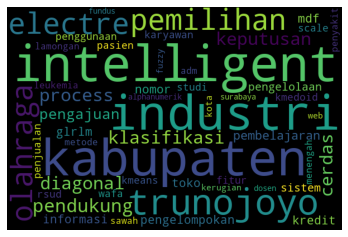

In [97]:
# topic 0
draw_word_cloud(0)


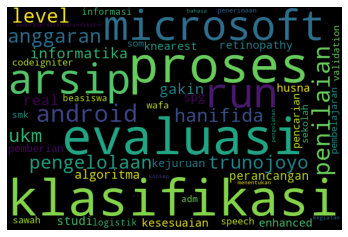

In [98]:
# topic 1
draw_word_cloud(1)  # ...

## THE END !!!

## [Please star/upvote in case u liked it. ]